# <center><span style='color:Green'>Advanced Regression - Assignment - Predicting House prices using Regularization</span></center>

# 1. Introduction

##  1.1 Description of Business

- A US-based housing company named Surprise Housing has decided to enter the Australian market.
- The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

## 1.2 Problem Statement

- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- The company is looking at prospective properties to buy to enter the market and wants to know:
    - Variables that are significant in predicting the price of a house
    - How well those variables describe the price of a house
- Determine the optimal value of lambda for Ridge and Lasso regression.

## 1.3  Assignment Objectives

- Modelling the price of houses with the available independent variables which will be a good way for management to understand the pricing dynamics of a new market

## 1.4 Problem Solving Approach

- 1 : Data Understanding
- 2 : Data Preparation
- 3 : EDA
- 4 : Model Training
- 5 : Model Prediction and Evaluation
- 6 : Ridge(L2) and Lasso(L1) Regularization
- 7 : Results
- 8 : Final Conclusions

# 2. Importing Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) #Ensuring that all the columns are visible during dataset display
pd.set_option('display.max_rows', None) #Ensuring that all the rows are visible during dataset display

# 3. Data Loading

In [2]:
#Loading the housing data from the CSV file and displaying the top 5 rows
df_house = pd.read_csv("train.csv") 
df_house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# 4. Data Description

### <center><span style='color:Red'>Important observation after going through the Data dictionary!</span></center>
The following categorical columns have one level NA, which might be erroneously considered as missing value by pandas:-
- Alley : NA = No alley access
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : NA = No Basement
- FireplaceQu : NA = No Fireplace
- GarageType, GarageFinish, GarageQual, GarageCond : NA = No Garage
- PoolQC : NA = No Pool
- Fence : NA = No Fence
- MiscFeature : NA = None

So, we will have to replace these by 'None' before finding missing values.
For this we will read the csv file again and set the parameter 'keep_default_na' to False

In [3]:
#As discussed above we are reloading the data where NA would not be read as NaN
df_house = pd.read_csv("train.csv", keep_default_na=False) 
df_house.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [4]:
# Replacing all 'NA' of all above mentioned columns by 'None'
df_house[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df_house[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
df_house.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [5]:
#Determining the number of rows and columns in the dataframe
df_house.shape

(1460, 81)

Therefore, the dataset has 1460 rows and 81 columns in total

In [6]:
#Displaying the information of the dataset in terms of column datatypes, rows and null values
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

After examining the data types of the available columns and tallying them with the data definition of each columns, we have concluded that the following column types need to be changed:
1. MSSubClass, OverallQual, OverallCond - Numeric to Categorical
2. LotFrontage and MasVnrArea - Categorical to Numeric

In [7]:
#Converting LotFrontage and MasVnrArea to 'numeric' type as mentioned above
df_house['LotFrontage'] = pd.to_numeric(df_house['LotFrontage'], errors='coerce')
df_house['MasVnrArea'] = pd.to_numeric(df_house['MasVnrArea'], errors='coerce')

In [8]:
#Converting MSSubClass, OverallQual and OverallCond 'object'type as mentioned above
df_house[['MSSubClass', 'OverallQual', 'OverallCond']] = df_house[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [9]:
#Validating whether the type change is successful
df_house[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [10]:
#Describing the dataset especially in terms of columns with numerical values
df_house.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.00

In [11]:
#Final checking for missing values or NA
df_house.isna().sum()[df_house.isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
dtype: int64

From the above results, we can conclude that:
- LotFrontage and MasVnrArea columns are having missing values and we will perform missing value treatment on them.
- Among the numerical columns, there are outliers present in columns such as LotFrontage, MasVnrArea, 2ndFlrSF, LowQualFinSF, BsmtFinSF1, BsmtFinSF2,  BsmtUnfSF etc (Concluded by looking at differences between: 75th percentile and max values AND/OR 25th percentile and min values)


In [12]:
#Displaying the information of the MODIFIED dataset in terms of column datatypes, rows and null values
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

# 5. Data Cleaning, Validation and Manipulation

## 5.1 Checking Duplicate Rows

In [13]:
# Finding the number of duplicate rows
print("No of duplicate row(s)" , df_house.duplicated().sum())

No of duplicate row(s) 0


Therefore, we can conclude that the dataset has 0 duplicate row(s)

## 5.2 Impute Missing Values

In [14]:
# We will impute missing values with median for LotFrontage and MasVnrArea, in order to ignore the effect of outliers
df_house["LotFrontage"].fillna(df_house["LotFrontage"].median(), inplace=True)
df_house["MasVnrArea"].fillna(df_house["MasVnrArea"].median(), inplace=True)

In [15]:
#Final checking for missing values or NA
len(df_house.isna().sum()[df_house.isna().sum() > 0])

0

Therefore, our dataset does not have any missing values

## 5.3 Removal of ID column

In [16]:
#We shall also drop the ID column as it is just a row identifier and cannot be used for EDA or modelling
df_house=df_house.drop('Id',axis='columns')

In [17]:
#Rounding off the numeric columns to 2 decimal places
df_house = df_house.round(decimals = 2)

In [18]:
#Checking the dataset after the above treatments
df_house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   
3         70       RL         60.0     9550   Pave  None      IR1         Lvl   
4         60       RL         84.0    14260   Pave  None      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story           7           5       2003          2003     Gable   
1     1Story           6           8       1976          1976     Gable   
2     2Story           7           5       2001          2002     Gable   
3     2Story           7           5       1915          1970     Gable   
4     2Story           8           5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0        None     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3       

Hence we can conclude, that all the Columns have correct data format as well as datatype

# 6. Exploratory Data Analysis ( EDA )

## 6.1 Univariate analysis of Target Variable

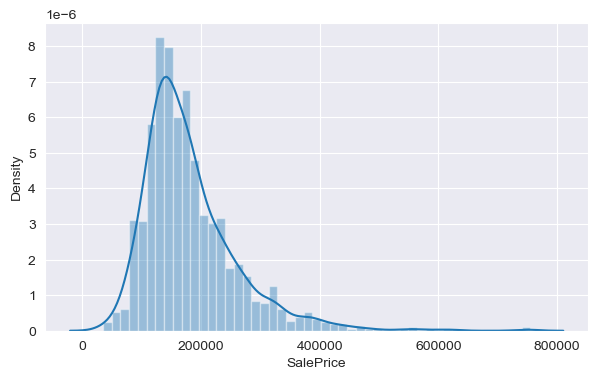

In [19]:
plt.figure(figsize=[7,4])
sns.set_style('darkgrid')
sns.distplot(df_house['SalePrice']);

Therefore, our target variable 'SalePrice' is right skewed

In [20]:
#Checking the skewness and the kurtosis of the target variable
print('SalePrice has a kurtosis of',df_house['SalePrice'].kurt());
print('SalePrice has a skewness of',df_house['SalePrice'].skew());

SalePrice has a kurtosis of 6.536281860064529
SalePrice has a skewness of 1.8828757597682129


From the above results we can conclude that,

- The kurtosis is greater than 1, implying that the target variable's distribution is highly peaked
- The skewness is greater than 1, implying that the target variable is highly skewed towards right

Therefore, we will perform log transformation of the target variable 'SalePrice'

In [21]:
#Saving the original target variable in another column
df_house['SalePriceOrig'] = df_house['SalePrice']

#Log transforming the target variable
df_house['SalePrice'] = np.log(df_house['SalePrice'])

In [22]:
#Checking the skewness and the kurtosis of the target variable post transformation
print('Post log transformation, SalePrice has a kurtosis of',df_house['SalePrice'].kurt());
print('Post log transformation,SalePrice has a skewness of',df_house['SalePrice'].skew());

Post log transformation, SalePrice has a kurtosis of 0.8095319958036296
Post log transformation,SalePrice has a skewness of 0.12133506220520406


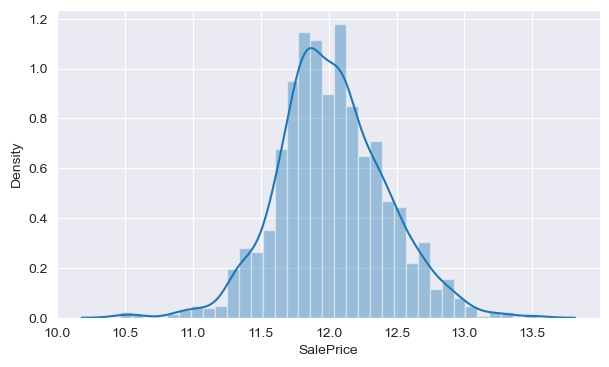

In [23]:
plt.figure(figsize=[7,4])
sns.distplot(df_house['SalePrice']);

From the above results we can conclude that post log transformation,

The kurtosis is lesser than 1
The skewness is lesser than 1

After performing log transformation of the target variable 'SalePrice', it is now symmetric and has an approximately normal distribution

### 6.1.1 Creating a new and more meaningful feature called Age, determining the age of the property which can be an important determinant of the price

In [24]:
#We will also create a new column for the age of the house
df_house['Age'] = df_house['YrSold'] - df_house['YearBuilt']

In [25]:
## Drop the two columns from which we created new one
df_house.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [26]:
#Dividing the columns basis whether they are numerical or categorical
num_cols = []
cat_cols = []
for col in df_house.columns :
    if df_house[col].dtype == "object":
        cat_cols.append(col)
    else:
        num_cols.append(col)
print("The",len(num_cols) ,"Numerical Columns given below are :\n")
print(num_cols,"\n") 
print("The",len(cat_cols) ,"Categorical Columns given below are :\n")
print(cat_cols)

The 33 Numerical Columns given below are :

['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'SalePriceOrig', 'Age'] 

The 47 Categorical Columns given below are :

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Kitche

## 6.2 Univariate Analysis of the Categorical columns

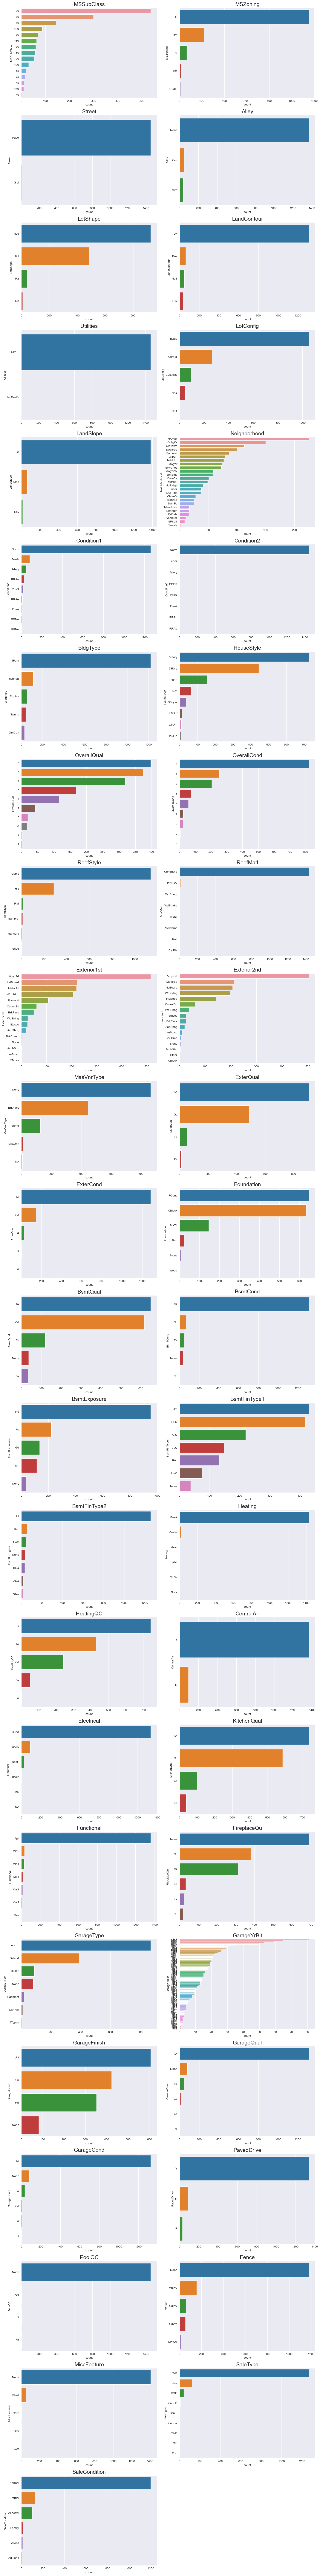

In [27]:
#Lets plot all the categorical columns
plt.figure(figsize=(15,120))#The size of the plot
r=1
for col in cat_cols:
    plt.subplot(24,2,r)
    sns.countplot(y=df_house[str(col)],order=df_house[str(col)].value_counts().sort_values(ascending=False).index)
    plt.title(str(col), fontsize=18) #Formatting the title for each plot
    r=r+1
plt.tight_layout() #Preventing layout overlaying
plt.show()

Therefore, we can conclude that all categorical columns have more than one unique values, and therefore we cannot remove any 

## 6.3 Univariate Analysis of the Numerical columns

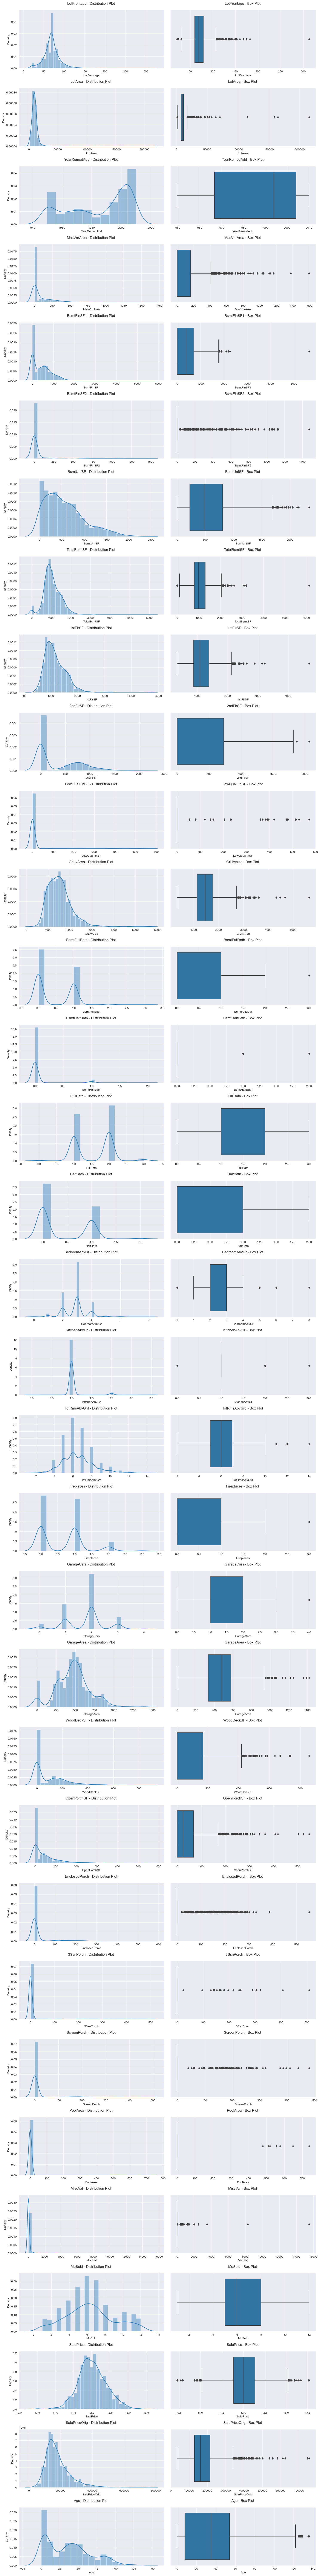

In [28]:
#Lets plot all the numerical columns
plt.figure(figsize=(15,120)) #The size of the plot
r=0
for col in num_cols:
    r=r+1
    plt.subplot(33,2,r)
    plt.title(str(col)+" - Distribution Plot \n")
    sns.distplot(df_house[str(col)])
    r=r+1
    plt.subplot(33,2,r)
    plt.title(str(col)+" - Box Plot \n")
    sns.boxplot(df_house[str(col)])
plt.tight_layout() #Preventing layout overlaying
plt.show()

Here, we can see Outliers in a number of variables but we will not drop all of them since this may lead to data loss. Therefore, the outliers will be effectively treated later on either via percentile or during min-max ( normalisation ) scaling

## 6.4 Bivariate/Multivariate Analysis

### 6.4.1 Bivariate Analysis

In [29]:
#Plotting SalePrice against all the categorical columns
plt.figure(figsize=(50,240))
c=0
for i in cat_cols:
    c=c+1
    plt.subplot(24,2,c)
    sns.boxplot(x = 'SalePrice', y = df_house[str(i)], data = df_house)
    plt.title(str(i)+" VS SalePrice - Box Plot\n",fontsize=20)  
plt.tight_layout()
plt.show()

### 6.4.2 Multivariate Analysis

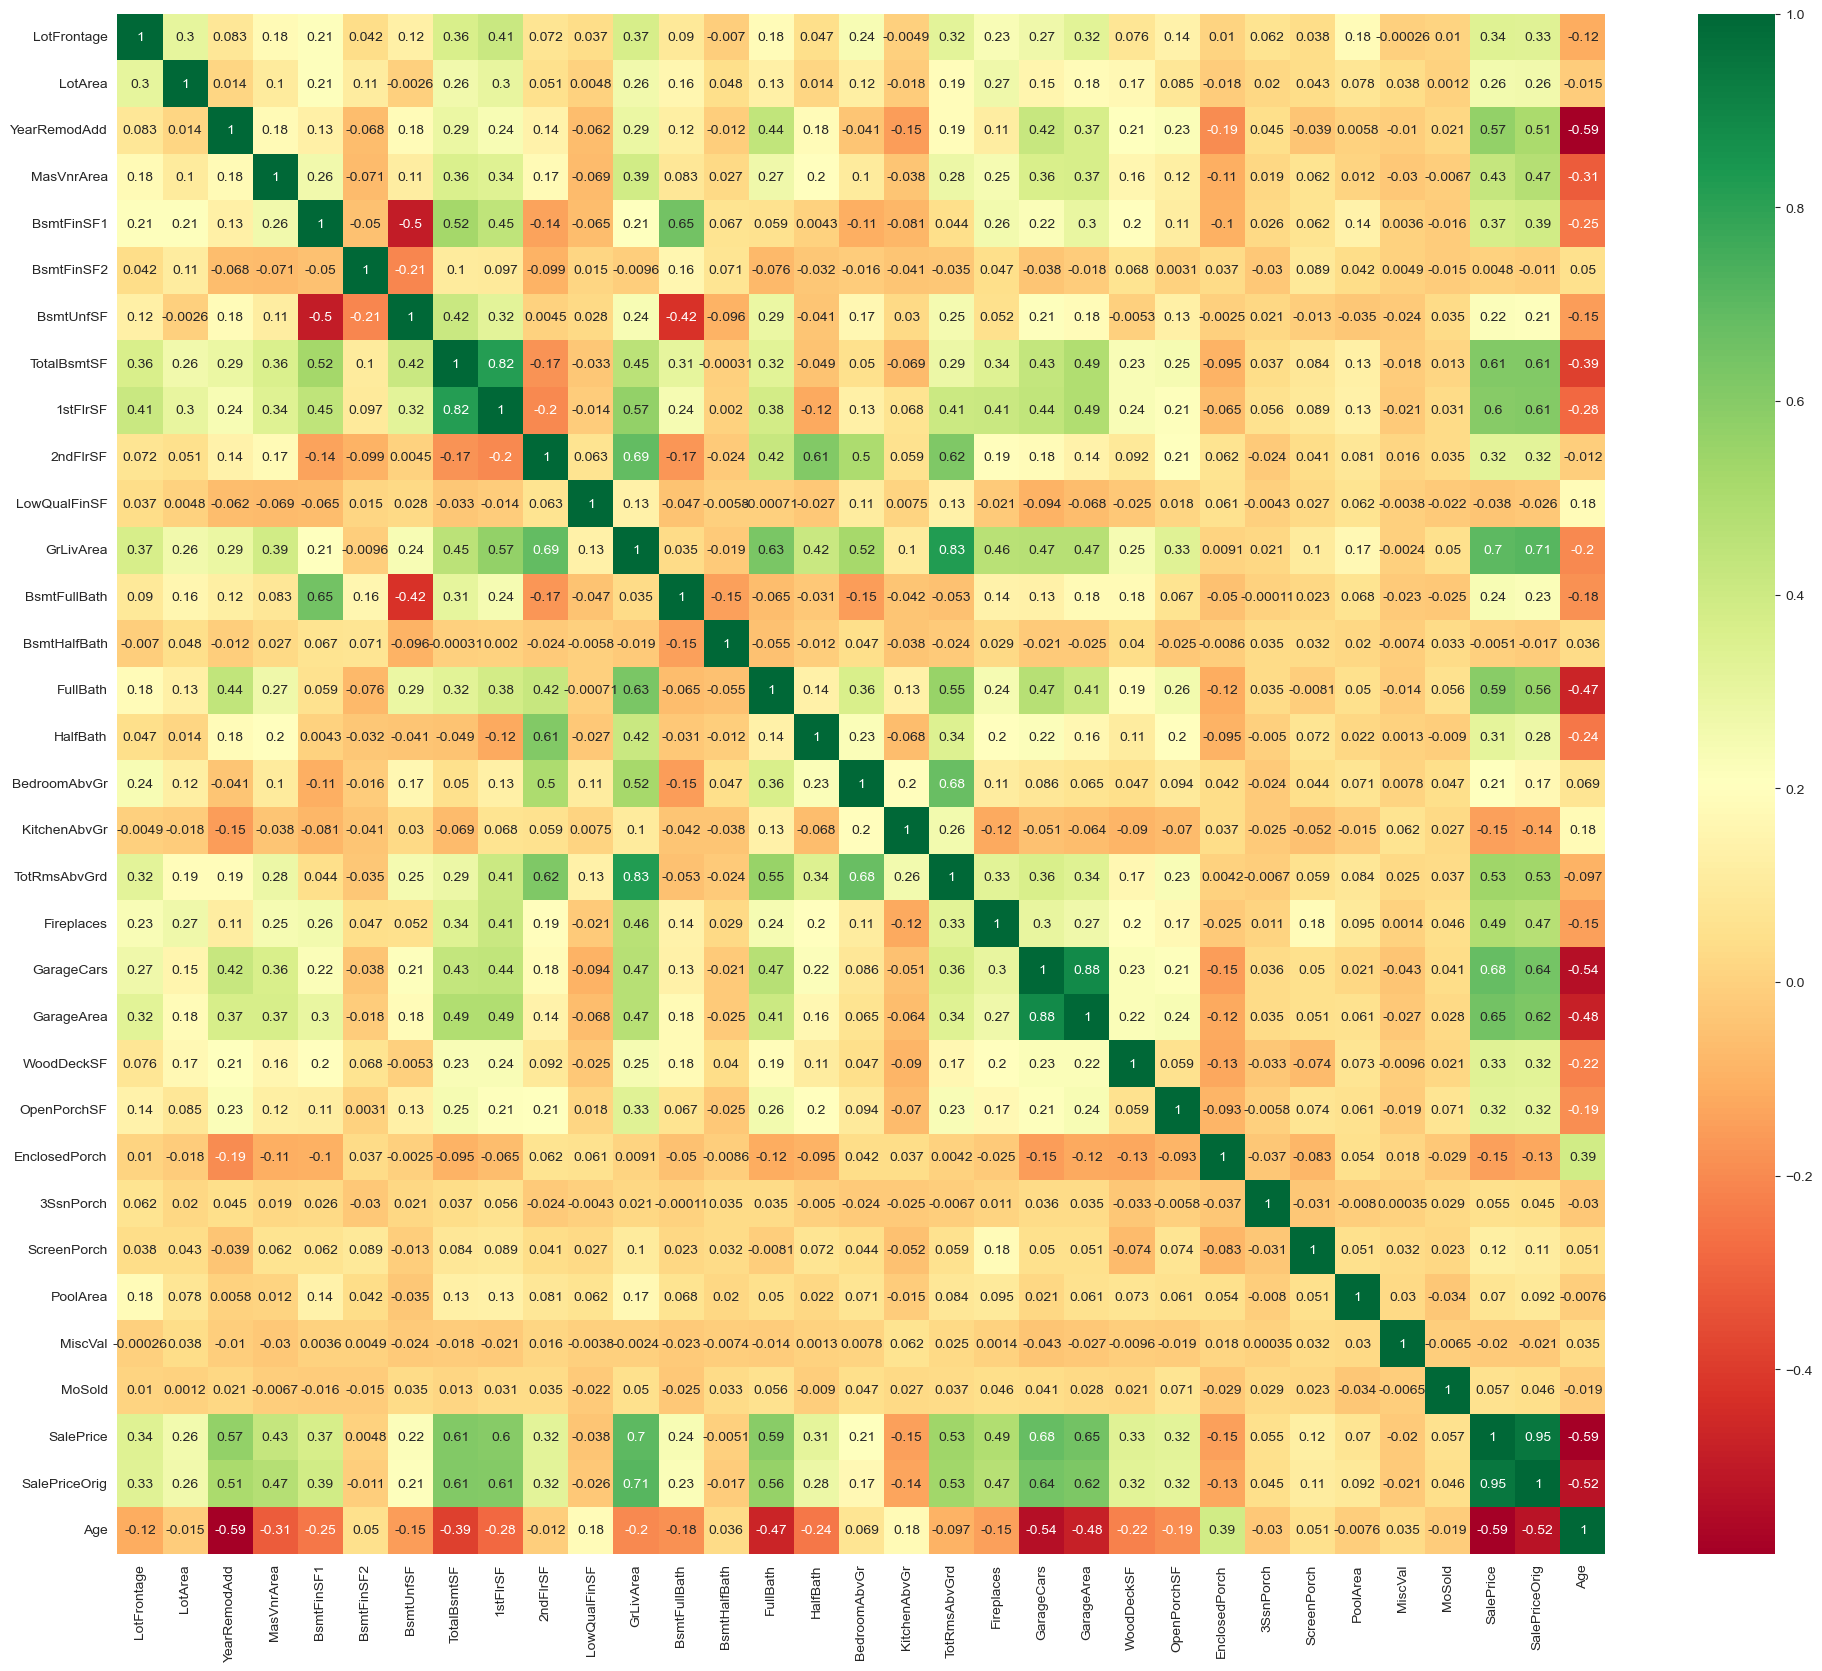

In [30]:
# Plotting heatmap to detect correlations among numerical variables
plt.figure(figsize=(24,20))
df_num = df_house[num_cols]
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');

In [31]:
#Also lets find out which variables has high correlation with SalesPrice
df_num.corr()['SalePrice'].round(decimals = 2).sort_values(ascending=False)

SalePrice        1.00
SalePriceOrig    0.95
GrLivArea        0.70
GarageCars       0.68
GarageArea       0.65
TotalBsmtSF      0.61
1stFlrSF         0.60
FullBath         0.59
YearRemodAdd     0.57
TotRmsAbvGrd     0.53
Fireplaces       0.49
MasVnrArea       0.43
BsmtFinSF1       0.37
LotFrontage      0.34
WoodDeckSF       0.33
OpenPorchSF      0.32
2ndFlrSF         0.32
HalfBath         0.31
LotArea          0.26
BsmtFullBath     0.24
BsmtUnfSF        0.22
BedroomAbvGr     0.21
ScreenPorch      0.12
PoolArea         0.07
MoSold           0.06
3SsnPorch        0.05
BsmtFinSF2       0.00
BsmtHalfBath    -0.01
MiscVal         -0.02
LowQualFinSF    -0.04
KitchenAbvGr    -0.15
EnclosedPorch   -0.15
Age             -0.59
Name: SalePrice, dtype: float64

#### Here we will use Pair Plot to analyze the relationship between Target variable **`SalePrice`** vs other Continous variables

In [32]:
#Figuring out the highly correlated columns wikth the target variable
highly_correlated_cols = list(df_num.corr()["SalePrice"][(df_num.corr()["SalePrice"]>0.50) | (df_num.corr()["SalePrice"]<-0.50)].index)
highly_correlated_cols

['YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'SalePriceOrig',
 'Age']

<Figure size 5000x9000 with 0 Axes>

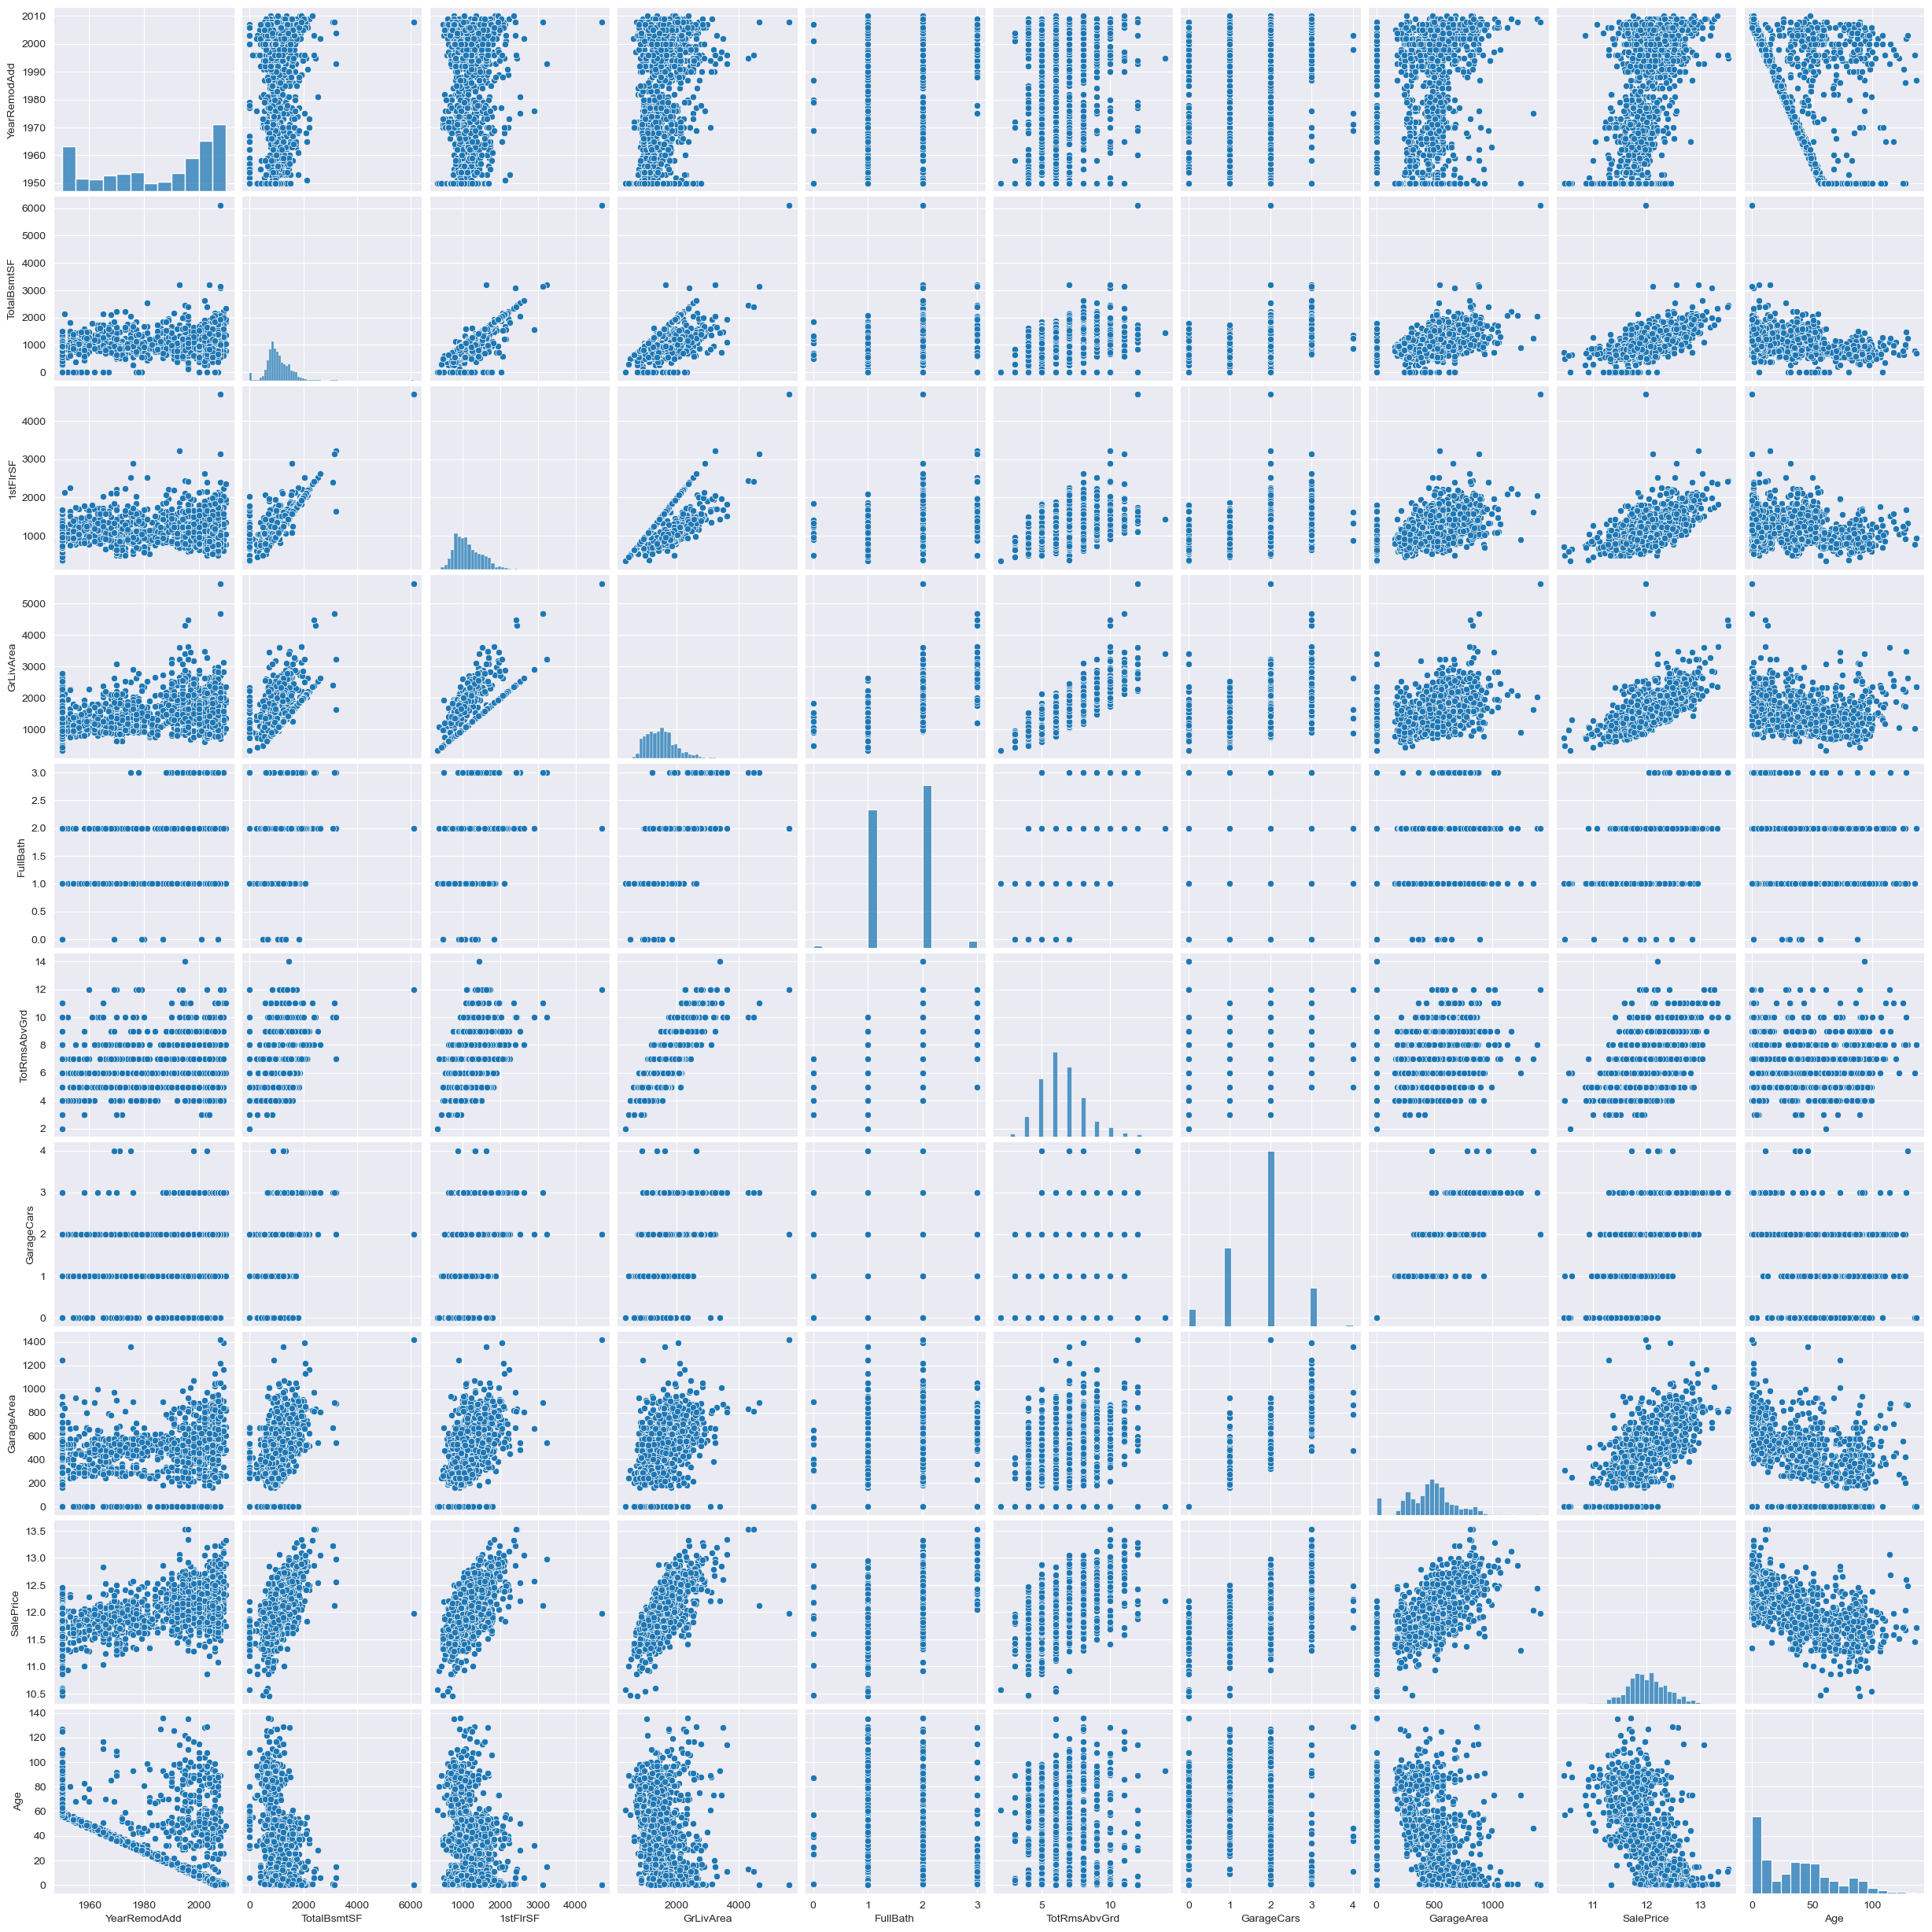

In [33]:
#Checking how the target variable varies with all these highly correlated columns
#Dropping SalePriceOrig as it is the untransformed version of SalesPrice
highly_correlated_cols.remove('SalePriceOrig')
#Generating plot
plt.figure(figsize = (50, 90))
sns.pairplot(df_house, vars= highly_correlated_cols)
plt.show()

We can observe from the above pair-plot that:
1. There is some linear relationship between **`SalesPrice`** and other variables such as **`TotalBsmtSF`**,**`1stFlrSF`**,**`GrLivArea`**,**`TotRmsAbvGrd`**,**`GarageArea`** and **`Age`**
2. Among the above, only the target variable **`SalesPrice`** and **`Age`** variable are negatively correlated. Rest are positively correlated
3. It is also observed that many of the predictors have linear relationships between themselves as well eg. **`1stFlrSF`** and **`TotalBsmtSF`**
4. Also certain variables for eg. **`GrLivArea`**, **`1stFlrSF`** and **`TotalBsmtSF`** show capped linearity

# 7. Data Preparation for Modelling

Data preparation has the following steps :
1. Encoding on Categorical Columns ( Encoding or creating Dummy Variables)
2. Outlier Treatment
3. Dividing the data in terms of Train and Test
4. Scaling on the Continous variables of Train data

## 7.1 Creating Dummy Variables for Categorical Columns

In [34]:
#Creating 2 separate dataframes, one with Categorical columns and another with Numerical columns

df_num = df_house[num_cols]
df_cat = df_house[cat_cols]

- We will create Dummy Variables using **`get_dummies`** function
- We will use the parameter **`drop_first`** as True to drop the 1st dummy variable of each categorical column to increases the efficiency of the model

In [35]:
## One hot encoding the categorical columns
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [36]:
## Checking the dimensions
df_cat_encoded.shape

(1460, 353)

### 7.2 Outlier treatment

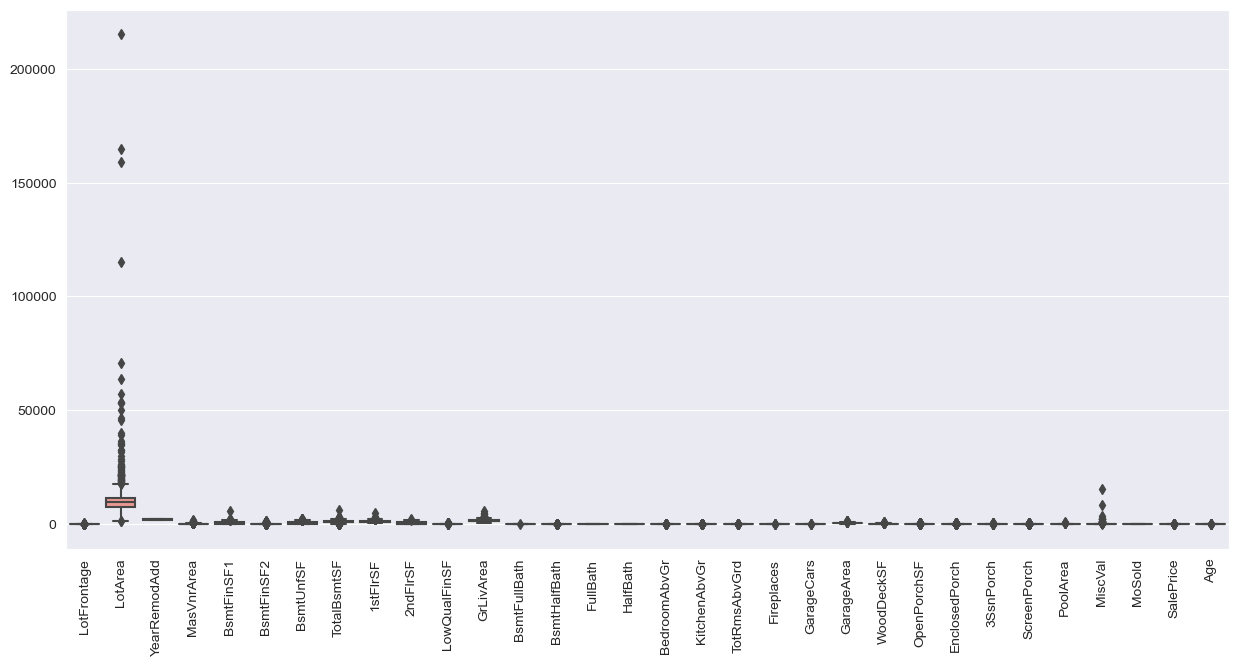

In [37]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,7])
plt.xticks(rotation=90)
#Dropping SalePriceOrig as it is the original version of Sale Price
df_num.drop(columns=['SalePriceOrig'],axis=1,inplace=True)
sns.boxplot(data=df_num);

In [38]:
#Limiting the outliers to 95% on the upper bound and 5% on the lower bound
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

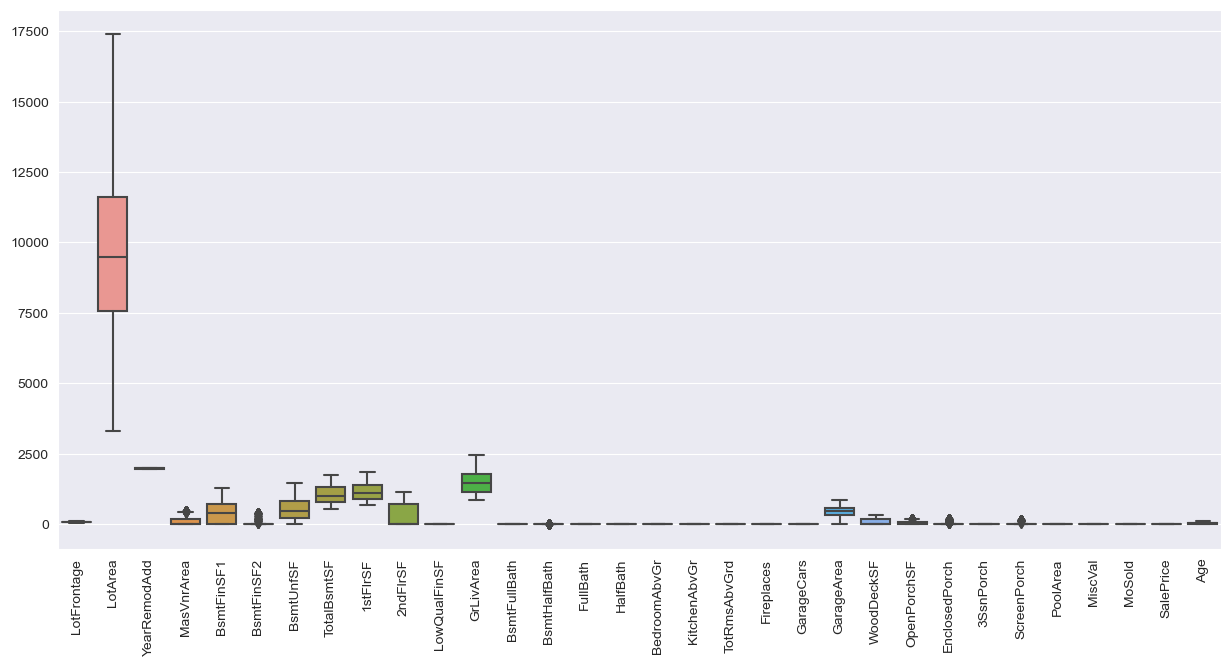

In [39]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,7])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

Thus, the outliers are removed from the numerical columns in the dataset. Now we will concatenate the encoded category columns and the outlier-treated numerical columns in a final dataframe

In [40]:
## Concatenating one hot encoded categorical columns and the outlier treated numerical columns
df = pd.concat([df_num, df_cat_encoded], axis=1)


## Viewing the first 5 rows
df.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150        856.0     856.0     854.0             0     1710.0   
1        284       1262.0    1262.0       0.0             0     1262.0   
2        434        920.0     920.0     866.0             0     1786.0   
3        540        756.0     961.0     756.0             0     1717.0   
4        490       1145.0    1145.0    1053.0             0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2       548.0           0         61.0   
1             6           1           2       460.0         298          0.0   
2             6           1           2       608.0           0         42.0   
3             7           1           3       642.0           0         35.0   
4             9           1           3       836.0         192         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0           0.00          0            0         0        0       2   
1           0.00          0            0         0        0       5   
2           0.00          0            0         0        0       9   
3         180.15          0            0         0        0       2   
4           0.00          0            0         0        0      11   

   SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0  12.247694    5              0              0              0              0   
1  12.109011   31              0              0              0              0   
2  12.317167    7              0              0              0              0   
3  11.849398   91              0              0              0              0   
4  12.429216    8              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            1            0   
3               0            0 

In [41]:
#viewing the rows and columns of the final datset
df.shape

(1460, 385)

### 7.3 Dividing the Data in terms of TRAIN and TEST

### Importing `sklearn` and `stats model` libraries for building and evaluating the model

In [42]:
import sklearn
from sklearn.model_selection import train_test_split #for spliting the data in terms of train and test
from sklearn.preprocessing import MinMaxScaler, StandardScaler #for performing minmax/standard scaling on the continous variables of training data
from sklearn.feature_selection import RFE #for performing automated Feature Selection
from sklearn.linear_model import LinearRegression #to build linear model
from sklearn.linear_model import Ridge #for ridge regularization
from sklearn.linear_model import Lasso #for lasso regularization
from sklearn.model_selection import GridSearchCV #finding the optimal parameter values
from sklearn.metrics import r2_score #for calculating the r-square value
import statsmodels.api as sm #for add the constant value
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor #to calculate the VIF
from sklearn.metrics import mean_squared_error #for calculating the mean squared error

In [43]:
#Creating X and y variables for training the model
X = df.drop(["SalePrice"], axis=1)
y = df["SalePrice"]

In [44]:
#Splitting the data into Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=108)

In [45]:
## Viewing dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1168, 384)
(1168,)


In [46]:
## Viewing dimensions of test data
print(X_test.shape)
print(y_test.shape)

(292, 384)
(292,)


## 7.4 Scaling of Features

In [47]:
# Generating a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [48]:
## Create a scaling instance
scaler = MinMaxScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [49]:
## Create another scaling instance
scaler = MinMaxScaler()

## Scale the numerical columns 
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

#### Verifying whether the values are scaled or not

In [50]:
X_train.describe()

LotFrontage      LotArea  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000   
mean      0.488967     0.452333      0.606750     0.204242     0.335145   
std       0.242121     0.246041      0.362764     0.310705     0.323989   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.353417     0.302854      0.280702     0.000000     0.000000   
50%       0.485672     0.437441      0.754386     0.000000     0.299058   
75%       0.632623     0.588369      0.947368     0.358004     0.547292   
max       1.000000     1.000000      1.000000     1.000000     1.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.078070     0.378075     0.428318     0.409645     0.304476   
std       0.246413     0.278245     0.281973     0.288478     0.363735   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.162636     0.218408     0.178538     0.000000   
50%       0.000000     0.325272     0.373430     0.350125     0.000000   
75%       0.000000     0.552452     0.616195     0.618406     0.640200   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count        1168.0  1168.000000   1168.000000   1168.000000  1168.000000   
mean            0.0     0.404796      0.409247      0.056507     0.553082   
std             0.0     0.278278      0.491905      0.230997     0.497387   
min             0.0     0.000000      0.000000      0.000000     0.000000   
25%             0.0     0.179068      0.000000      0.000000     0.000000   
50%             0.0     0.384092      0.000000      0.000000     1.000000   
75%             0.0     0.576139      1.000000      0.000000     1.000000   
max             0.0     1.000000      1.000000      1.000000     1.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000        1168.0   1168.000000  1168.000000   
mean      0.377568      0.446490           0.0      0.418807     0.308219   
std       0.484987      0.329765           0.0      0.252560     0.316012   
min       0.000000      0.000000           0.0      0.000000     0.000000   
25%       0.000000      0.000000           0.0      0.166667     0.000000   
50%       0.000000      0.500000           0.0      0.333333     0.500000   
75%       1.000000      0.500000           0.0      0.500000     0.500000   
max       1.000000      1.000000           0.0      1.000000     1.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      0.580194     0.543088     0.261010     0.245849       0.105115   
std       0.248847     0.239664     0.325104     0.303232       0.278898   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.333333     0.367016     0.000000     0.000000       0.000000   
50%       0.666667     0.555229     0.000000     0.142816       0.000000   
75%       0.666667     0.677567     0.501493     0.389889       0.000000   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

       3SsnPorch  ScreenPorch  PoolArea  MiscVal       MoSold          Age  \
count     1168.0  1168.000000    1168.0   1168.0  1168.000000  1168.000000   
mean         0.0     0.071238       0.0      0.0     0.486206     0.395301   
std          0.0     0.249506       0.0      0.0     0.279831     0.323583   
min          0.0     0.000000       0.0      0.0     0.000000     0.000000   
25%          0.0     0.000000       0.0      0.0     0.333333     0.077778   
50%          0.0     0.000000       0.0      0.0     0.444444     0.388889   
75%          0.0     0.000000       0.0      

In [51]:
X_test.describe()

LotFrontage     LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
count   292.000000  292.000000    292.000000  292.000000  292.000000   
mean      0.480766    0.451445      0.625150    0.192329    0.351291   
std       0.244821    0.247663      0.353065    0.298885    0.322065   
min       0.000000    0.000000      0.000000    0.000000    0.000000   
25%       0.353417    0.297265      0.346491    0.000000    0.000000   
50%       0.485672    0.440102      0.771930    0.000000    0.321821   
75%       0.617928    0.588955      0.947368    0.362390    0.593995   
max       1.000000    1.000000      1.000000    1.000000    1.000000   

       BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF  \
count  292.000000  292.000000   292.000000  292.000000  292.000000   
mean     0.103307    0.383263     0.461692    0.428722    0.262008   
std      0.281125    0.298968     0.276898    0.286472    0.363317   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%      0.000000    0.130279     0.252047    0.204222    0.000000   
50%      0.000000    0.326975     0.409905    0.386817    0.000000   
75%      0.000000    0.536614     0.683067    0.647975    0.628369   
max      1.000000    1.000000     1.000000    1.000000    1.000000   

       LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count         292.0  292.000000    292.000000    292.000000  292.000000   
mean            0.0    0.392193      0.431507      0.054795    0.530822   
std             0.0    0.279918      0.496137      0.227969    0.499906   
min             0.0    0.000000      0.000000      0.000000    0.000000   
25%             0.0    0.167480      0.000000      0.000000    0.000000   
50%             0.0    0.374513      0.000000      0.000000    1.000000   
75%             0.0    0.569804      1.000000      0.000000    1.000000   
max             0.0    1.000000      1.000000      1.000000    1.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000         292.0    292.000000  292.000000   
mean     0.363014      0.419521           0.0      0.408676    0.291096   
std      0.481694      0.330878           0.0      0.253334    0.322452   
min      0.000000      0.000000           0.0      0.000000    0.000000   
25%      0.000000      0.000000           0.0      0.166667    0.000000   
50%      0.000000      0.500000           0.0      0.333333    0.000000   
75%      1.000000      0.500000           0.0      0.500000    0.500000   
max      1.000000      1.000000           0.0      1.000000    1.000000   

       GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  292.000000  292.000000  292.000000   292.000000     292.000000   
mean     0.618721    0.581370    0.282672     0.240964       0.111156   
std      0.234451    0.227481    0.332235     0.305531       0.283253   
min      0.000000    0.000000    0.000000     0.000000       0.000000   
25%      0.333333    0.455829    0.000000     0.000000       0.000000   
50%      0.666667    0.585225    0.107463     0.137104       0.000000   
75%      0.666667    0.687272    0.537313     0.368466       0.000000   
max      1.000000    1.000000    1.000000     1.000000       1.000000   

       3SsnPorch  ScreenPorch  PoolArea  MiscVal      MoSold         Age  \
count      292.0   292.000000     292.0    292.0  292.000000  292.000000   
mean         0.0     0.076948       0.0      0.0    0.455860    0.362367   
std          0.0     0.255972       0.0      0.0    0.296696    0.306062   
min          0.0     0.000000       0.0      0.0    0.000000    0.000000   
25%          0.0     0.000000       0.0      0.0    0.222222    0.055556   
50%          0.0     0.000000       0.0      0.0    0.444444    0.355556   
75%          0.0     0.000000       0.0      0.0    0.666667    0.566667   
max          0.0     1.000000       0.0      0.0    1.000000    1.000000   

       MSSubClass_30  MSSubClass

Therefore, we can see that the values are perfectly scaled according to the scaler

# 8. Training the Model

### Model 1 - Unregularized Model (Alpha = 0)

In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9574554731046967
Testing R2
-1.5671312345588561e+21


We can observe in the unregularized model, that while the model has a R2 of 95% on training Data but it has an extremely unrealistic R2 score on the testing data. Therefore, it shows signs of overfitting and needs regularization

In [53]:
## Given below is a function for displaying the metrics post regularization
def display_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", rss_train)
    print("RSS (Test) =", rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", mse_train)
    print("MSE (Test) =", mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", rmse_train) 
    print("RMSE (Test) =", rmse_test) 
    

    return metric

In [54]:
# list of alphas to tune
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# 9. Model Prediction and Evaluation

## 9.1 Ridge - L2 Regularization

In [55]:
ridge = Ridge()

# cross validation
ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
ridgeCV.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [56]:
## View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 10.0}

#### Therefore, we have an alpha of 10 for optimum results. Let us plug in this value for the L2-Ridge regression

In [57]:
ridge = Ridge(alpha=10.0)

#Fitting X_train and y_train and generating coefficients
ridge.fit(X_train, y_train)
ridge.coef_

array([[ 1.40221934e-02,  6.22274100e-02,  3.98748158e-02,
         3.04917722e-03,  4.38408932e-02,  9.28243338e-03,
         8.90713787e-03,  8.76275847e-02,  7.74646268e-02,
         7.04956672e-02,  0.00000000e+00,  1.25838564e-01,
         1.29505202e-02, -1.76281621e-03,  3.37079672e-02,
         2.62523151e-02,  1.70970173e-02,  0.00000000e+00,
         1.12793964e-02,  2.21778412e-02,  4.72334340e-02,
         5.87689147e-02,  2.27778229e-02,  1.83068726e-02,
         2.82312868e-03,  0.00000000e+00,  3.22888116e-02,
         0.00000000e+00,  0.00000000e+00,  3.49285439e-03,
        -5.26447798e-02, -3.59231255e-02, -1.74264115e-03,
        -6.63920718e-03, -2.90937597e-03,  2.17932349e-04,
         3.48944834e-02,  1.98785234e-02, -3.50938914e-03,
         1.89393840e-03, -1.41760471e-02,  1.87785430e-03,
        -3.49949104e-02, -9.83449733e-03, -1.42897474e-02,
         3.35875829e-02,  1.54031968e-02,  3.02159521e-02,
        -7.12047033e-03,  1.02408118e-02, -9.62149904e-0

In [58]:
## Making predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

## Check metrics
ridge_metrics = display_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.9413669190755173
R-Squared (Test) = 0.9114555114514473
RSS (Train) = 5.030580968428266
RSS (Test) = 1.7709052235470062
MSE (Train) = 0.004307004253791324
MSE (Test) = 0.006064743916256871
RMSE (Train) = 0.0656277704465977
RMSE (Test) = 0.07787646574066437


Here we can see that by using an alpha of 10, we get an R-squared of 94% on training and 91% on test set

In [59]:
#Creating dataset from the Grid Search results
cv_results = pd.DataFrame(ridgeCV.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.012074      0.001039         0.003280        0.001159         0.0   
1       0.011069      0.001074         0.003725        0.000492         0.0   
2       0.010923      0.001367         0.003319        0.000411    0.000001   
3       0.010745      0.001133         0.004744        0.000922     0.00001   
4       0.011516      0.002993         0.002815        0.003205      0.0001   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-08}           0.811247           0.742313           0.850718   
1   {'alpha': 1e-07}           0.811247           0.742314           0.850718   
2   {'alpha': 1e-06}           0.811259           0.742321           0.850720   
3   {'alpha': 1e-05}           0.811373           0.742400           0.850746   
4  {'alpha': 0.0001}           0.812458           0.743179           0.850988   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.809986           0.804956         0.803844        0.034863   
1           0.809986           0.804958         0.803844        0.034862   
2           0.809987           0.804972         0.803852        0.034861   
3           0.810004           0.805120         0.803929        0.034846   
4           0.810167           0.806508         0.804660        0.034701   

   rank_test_score  split0_train_score  split1_train_score  \
0               30            0.962282            0.960650   
1               29            0.962282            0.960650   
2               28            0.962282            0.960650   
3               27            0.962282            0.960650   
4               26            0.962282            0.960649   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.964372            0.967704            0.961872   
1            0.964372            0.967704            0.961872   
2            0.964372            0.967704            0.961872   
3            0.964372            0.967704            0.961872   
4            0.964371            0.967704            0.961871   

   mean_train_score  std_train_score  
0          0.963376         0.002474  
1          0.963376         0.002474  
2          0.963376         0.002474  
3          0.963376         0.002474  
4          0.963376         0.002475

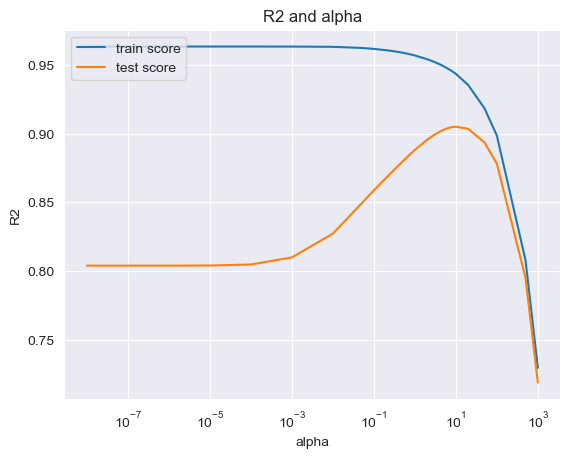

In [60]:
# plotting mean test and train R2 scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.xscale('log')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

- Therefore, we can conclude from the plot that an alpha of 10 is the most optimum score in Ridge L2 regularized Regression
- We can also conclude from the plot that as alpha increases, the Train R2 score remains stable until about 0.1 and then starts to curve down, then beyond 10 it starts to fall steep
- On a similar note, the Test R2 score initially increases as alpha increases until 10 and then it reverses and starts falling

## 9.2 Lasso - L1 Regularization

In [61]:
lasso = Lasso()

# cross validation
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [62]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

#### Therefore we have an alpha of 0.001 for optimum results. Let us plug in this value for the L1-Lasso regression

In [63]:
lasso = Lasso(alpha=0.001)

#Fitting X_train and y_train and generating coefficients
lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.00000000e+00,  6.87827870e-02,  5.50271344e-02,  0.00000000e+00,
        4.87786200e-02,  0.00000000e+00, -0.00000000e+00,  1.27432548e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.92044949e-01,
        1.00205305e-02, -0.00000000e+00,  1.62394627e-02,  1.82277957e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.64722777e-03,
        5.32090667e-02,  6.15549679e-02,  1.77829617e-02,  1.05127287e-02,
       -0.00000000e+00,  0.00000000e+00,  2.20518342e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -7.23721054e-02, -1.46023538e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.25105099e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.87904703e-03,  0.00000000e+00, -2.60506120e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.36696608e-02,
       -2.47851841e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [64]:
## Making predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

## Check metrics
lasso_metrics = display_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.9206635057263006
R-Squared (Test) = 0.9006636724850594
RSS (Train) = 186969.28864717038
RSS (Test) = 10735.319546929646
MSE (Train) = 0.005827812779577709
MSE (Test) = 0.006803917418634002
RMSE (Train) = 0.07634011252007498
RMSE (Test) = 0.0824858619318123


Here we can see that by using an alpha of 0.001, we get an R-squared of 92% on training and 90% on test set

In [65]:
#Creating dataset from the Grid Search results
cv_results = pd.DataFrame(lassoCV.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.227573      0.012476         0.003938        0.001169         0.0   
1       0.194761      0.021539         0.002747        0.001838         0.0   
2       0.190959      0.016326         0.002822        0.001645    0.000001   
3       0.195302      0.029620         0.002400        0.001238     0.00001   
4       0.048689      0.017425         0.003554        0.003557      0.0001   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-08}           0.810246           0.744440           0.852540   
1   {'alpha': 1e-07}           0.811442           0.745730           0.853782   
2   {'alpha': 1e-06}           0.819064           0.757653           0.855689   
3   {'alpha': 1e-05}           0.838272           0.832684           0.867666   
4  {'alpha': 0.0001}           0.890818           0.918230           0.886363   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.809752           0.818268         0.807049        0.035022   
1           0.810113           0.819162         0.808046        0.034970   
2           0.813143           0.825525         0.814215        0.031849   
3           0.836719           0.842955         0.843659        0.012446   
4           0.889590           0.900607         0.897121        0.011575   

   rank_test_score  split0_train_score  split1_train_score  \
0                7            0.962166            0.960536   
1                6            0.962152            0.960521   
2                5            0.962024            0.960397   
3                3            0.961131            0.959584   
4                2            0.950696            0.949087   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.964303            0.967703            0.961741   
1            0.964296            0.967702            0.961727   
2            0.964244            0.967691            0.961607   
3            0.963436            0.967043            0.960901   
4            0.953733            0.954837            0.951737   

   mean_train_score  std_train_score  
0          0.963290         0.002520  
1          0.963280         0.002525  
2          0.963193         0.002571  
3          0.962419         0.002624  
4          0.952018         0.002064

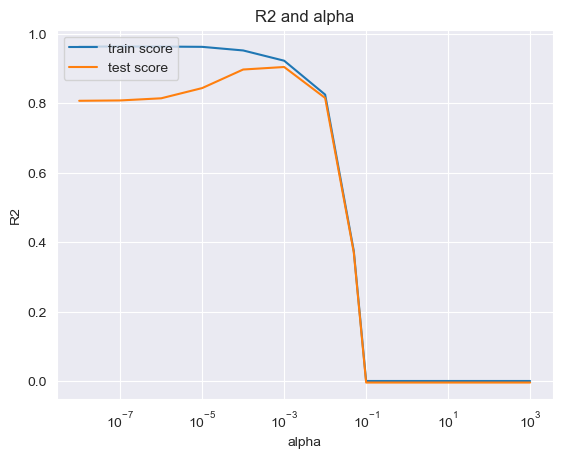

In [66]:
# plotting mean test and train R2 scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.xscale('log')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

- Therefore, we can conclude from the plot that an alpha of 0.001 is the most optimum score in Lasso L1 regularized Regression
- We can also conclude from the plot that as alpha increases, the Train R2 score remains stable until about 0.00001 and then starts to curve down, then beyond 0.001 it starts to fall steep and settles at zero, 0.1 onwards
- On a similar note, the Test R2 score initially increases as alpha increases until 0.001 and then it reverses and starts falling
- Additionally we can see that in the coefficients generated against the predictor variables, some of these coefficients are 0 and hence, this can help a lot in feature selection

## 9.3 Comparing the coefficients of features between Lasso and Ridge regression

In [67]:
## Examining coefficients after regularization

## Step 1: Creating empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, ...]

In [68]:
## Step 2: Creating one column for ridge coefficients and one for lasso coefficients, and putting the values
betas['Ridge'] = ridge.coef_.reshape(-1,1)
betas['Lasso'] = lasso.coef_.reshape(-1,1)

In [69]:
## Step 3: Checking Coefficients
betas

Ridge     Lasso
LotFrontage            0.014022  0.000000
LotArea                0.062227  0.068783
YearRemodAdd           0.039875  0.055027
MasVnrArea             0.003049  0.000000
BsmtFinSF1             0.043841  0.048779
BsmtFinSF2             0.009282  0.000000
BsmtUnfSF              0.008907 -0.000000
TotalBsmtSF            0.087628  0.127433
1stFlrSF               0.077465  0.000000
2ndFlrSF               0.070496  0.000000
LowQualFinSF           0.000000  0.000000
GrLivArea              0.125839  0.292045
BsmtFullBath           0.012951  0.010021
BsmtHalfBath          -0.001763 -0.000000
FullBath               0.033708  0.016239
HalfBath               0.026252  0.018228
BedroomAbvGr           0.017097  0.000000
KitchenAbvGr           0.000000  0.000000
TotRmsAbvGrd           0.011279  0.000000
Fireplaces             0.022178  0.003647
GarageCars             0.047233  0.053209
GarageArea             0.058769  0.061555
WoodDeckSF             0.022778  0.017783
OpenPorchSF            0.018307  0.010513
EnclosedPorch          0.002823 -0.000000
3SsnPorch              0.000000  0.000000
ScreenPorch            0.032289  0.022052
PoolArea               0.000000  0.000000
MiscVal                0.000000  0.000000
MoSold                 0.003493  0.000000
Age                   -0.052645 -0.072372
MSSubClass_30         -0.035923 -0.014602
MSSubClass_40         -0.001743 -0.000000
MSSubClass_45         -0.006639 -0.000000
MSSubClass_50         -0.002909  0.000000
MSSubClass_60          0.000218  0.000000
MSSubClass_70          0.034894  0.012511
MSSubClass_75          0.019879  0.000000
MSSubClass_80         -0.003509  0.000000
MSSubClass_85          0.001894  0.000000
MSSubClass_90         -0.014176 -0.004879
MSSubClass_120         0.001878  0.000000
MSSubClass_160        -0.034995 -0.026051
MSSubClass_180        -0.009834 -0.000000
MSSubClass_190        -0.014290 -0.000000
MSZoning_FV            0.033588  0.000000
MSZoning_RH            0.015403  0.000000
MSZoning_RL            0.030216  0.013670
MSZoning_RM           -0.007120 -0.024785
Street_Pave            0.010241  0.000000
Alley_None            -0.009621 -0.000000
Alley_Pave            -0.000640  0.000000
LotShape_IR2           0.013669  0.000000
LotShape_IR3          -0.030456 -0.000000
LotShape_Reg           0.002160 -0.002789
LandContour_HLS        0.027029  0.000000
LandContour_Low        0.005667  0.000000
LandContour_Lvl        0.015994 -0.000000
Utilities_NoSeWa       0.000000  0.000000
LotConfig_CulDSac      0.020000  0.009010
LotConfig_FR2         -0.015018 -0.000000
LotConfig_FR3         -0.002256  0.000000
LotConfig_Inside      -0.005694 -0.000000
LandSlope_Mod          0.009223  0.000000
LandSlope_Sev         -0.001901  0.000000
Neighborhood_Blueste  -0.002036 -0.000000
Neighborhood_BrDale   -0.007077 -0.000000
Neighborhood_BrkSide   0.026501  0.016474
Neighborhood_ClearCr   0.028068  0.000000
Neighborhood_CollgCr  -0.010439 -0.000000
Neighborhood_Crawfor   0.068510  0.078787
Neighborhood_Edwards  -0.044840 -0.026209
Neighborhood_Gilbert  -0.008623 -0.000000
Neighborhood_IDOTRR   -0.017827 -0.000000
Neighborhood_MeadowV  -0.051078 -0.000175
Neighborhood_Mitchel  -0.011416 -0.000000
Neighborhood_NAmes    -0.025735 -0.000000
Neighborhood_NPkVill  -0.000217  0.000000
Neighborhood_NWAmes   -0.012967 -0.000000
Neighborhood_NoRidge   0.018023  0.000000
Neighborhood_NridgHt   0.038779  0.020024
Neighborhood_OldTown  -0.023712 -0.000000
Neighborhood_SWISU    -0.014936 -0.000000
Neighborhood_Sawyer   -0.020616 -0.000000
Neighborhood_SawyerW  -0.006866 -0.000000
Neighborhood_Somerst   0.047197  0.056154
Neighborhood_StoneBr   0.041051  0.000000
Neighborhood_Timber    0.012500  0.000000
Neighborhood_Veenker   0.011423  0.000000
Condition1_Feedr       0.000707 -0.000000
Condition1_Norm        0.030249  0.026544
Condition1_PosA        0.007956  0.000000
Condition1_PosN        0.015909  0.000000
Condition1_RRAe       -0.023287 -0.000000
Condition1_RRAn        0.001848  0.0

In [70]:
#Number of features eliminated by Lasso
print("Number of eliminated features",len(betas[betas['Lasso']==0].values))


Number of eliminated features 318


Therefore, the number of features in ridge that are eliminated by Lasso are 317

In [71]:
#LIsting the eliminated features
print("The eliminated features are: ")

betas[betas['Lasso']==0]

The eliminated features are: 


Ridge  Lasso
LotFrontage            0.014022    0.0
MasVnrArea             0.003049    0.0
BsmtFinSF2             0.009282    0.0
BsmtUnfSF              0.008907   -0.0
1stFlrSF               0.077465    0.0
2ndFlrSF               0.070496    0.0
LowQualFinSF           0.000000    0.0
BsmtHalfBath          -0.001763   -0.0
BedroomAbvGr           0.017097    0.0
KitchenAbvGr           0.000000    0.0
TotRmsAbvGrd           0.011279    0.0
EnclosedPorch          0.002823   -0.0
3SsnPorch              0.000000    0.0
PoolArea               0.000000    0.0
MiscVal                0.000000    0.0
MoSold                 0.003493    0.0
MSSubClass_40         -0.001743   -0.0
MSSubClass_45         -0.006639   -0.0
MSSubClass_50         -0.002909    0.0
MSSubClass_60          0.000218    0.0
MSSubClass_75          0.019879    0.0
MSSubClass_80         -0.003509    0.0
MSSubClass_85          0.001894    0.0
MSSubClass_120         0.001878    0.0
MSSubClass_180        -0.009834   -0.0
MSSubClass_190        -0.014290   -0.0
MSZoning_FV            0.033588    0.0
MSZoning_RH            0.015403    0.0
Street_Pave            0.010241    0.0
Alley_None            -0.009621   -0.0
Alley_Pave            -0.000640    0.0
LotShape_IR2           0.013669    0.0
LotShape_IR3          -0.030456   -0.0
LandContour_HLS        0.027029    0.0
LandContour_Low        0.005667    0.0
LandContour_Lvl        0.015994   -0.0
Utilities_NoSeWa       0.000000    0.0
LotConfig_FR2         -0.015018   -0.0
LotConfig_FR3         -0.002256    0.0
LotConfig_Inside      -0.005694   -0.0
LandSlope_Mod          0.009223    0.0
LandSlope_Sev         -0.001901    0.0
Neighborhood_Blueste  -0.002036   -0.0
Neighborhood_BrDale   -0.007077   -0.0
Neighborhood_ClearCr   0.028068    0.0
Neighborhood_CollgCr  -0.010439   -0.0
Neighborhood_Gilbert  -0.008623   -0.0
Neighborhood_IDOTRR   -0.017827   -0.0
Neighborhood_Mitchel  -0.011416   -0.0
Neighborhood_NAmes    -0.025735   -0.0
Neighborhood_NPkVill  -0.000217    0.0
Neighborhood_NWAmes   -0.012967   -0.0
Neighborhood_NoRidge   0.018023    0.0
Neighborhood_OldTown  -0.023712   -0.0
Neighborhood_SWISU    -0.014936   -0.0
Neighborhood_Sawyer   -0.020616   -0.0
Neighborhood_SawyerW  -0.006866   -0.0
Neighborhood_StoneBr   0.041051    0.0
Neighborhood_Timber    0.012500    0.0
Neighborhood_Veenker   0.011423    0.0
Condition1_Feedr       0.000707   -0.0
Condition1_PosA        0.007956    0.0
Condition1_PosN        0.015909    0.0
Condition1_RRAe       -0.023287   -0.0
Condition1_RRAn        0.001848    0.0
Condition1_RRNe       -0.004116   -0.0
Condition1_RRNn        0.015114    0.0
Condition2_Feedr      -0.004282   -0.0
Condition2_Norm        0.020351    0.0
Condition2_PosA        0.024055    0.0
Condition2_PosN       -0.023381   -0.0
Condition2_RRAe        0.000000    0.0
Condition2_RRAn       -0.008011   -0.0
Condition2_RRNn        0.010317    0.0
BldgType_2fmCon       -0.014290   -0.0
BldgType_TwnhsE       -0.008367   -0.0
HouseStyle_1.5Unf     -0.008448   -0.0
HouseStyle_1Story      0.003348   -0.0
HouseStyle_2.5Fin      0.006533    0.0
HouseStyle_2.5Unf     -0.001610    0.0
HouseStyle_2Story     -0.013541   -0.0
HouseStyle_SFoyer      0.004149    0.0
OverallQual_2         -0.004425   -0.0
OverallQual_6         -0.009005   -0.0
OverallQual_10        -0.004451    0.0
OverallCond_2         -0.021466   -0.0
OverallCond_6          0.012662    0.0
OverallCond_8          0.027264    0.0
RoofStyle_Gable       -0.010214   -0.0
RoofStyle_Gambrel     -0.005707    0.0
RoofStyle_Hip         -0.008210    0.0
RoofStyle_Mansard      0.012005    0.0
RoofStyle_Shed         0.006515    0.0
RoofMatl_CompShg       0.005876   -0.0
RoofMatl_Membran       0.013727    0.0
RoofMatl_Metal         0.002491    0.0
RoofMatl_Roll          0.000089   -0.0
RoofMatl_Tar&Grv      -0.007022   -0.0
RoofMatl_WdShake       0.005754    0.0
RoofMatl_WdShngl       0.024501    0.0
Exterior1st_AsphShn   -0.003828   -0.0
Exterior1st_BrkComm    0.000890   -0.0
Exterior1

In [72]:
#Listing the features selected by Lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotArea                 0.068783
YearRemodAdd            0.055027
BsmtFinSF1              0.048779
TotalBsmtSF             0.127433
GrLivArea               0.292045
BsmtFullBath            0.010021
FullBath                0.016239
HalfBath                0.018228
Fireplaces              0.003647
GarageCars              0.053209
GarageArea              0.061555
WoodDeckSF              0.017783
OpenPorchSF             0.010513
ScreenPorch             0.022052
Age                    -0.072372
MSSubClass_30          -0.014602
MSSubClass_70           0.012511
MSSubClass_90          -0.004879
MSSubClass_160         -0.026051
MSZoning_RL             0.013670
MSZoning_RM            -0.024785
LotShape_Reg           -0.002789
LotConfig_CulDSac       0.009010
Neighborhood_BrkSide    0.016474
Neighborhood_Crawfor    0.078787
Neighborhood_Edwards   -0.026209
Neighborhood_MeadowV   -0.000175
Neighborhood_NridgHt    0.020024
Neighborhood_Somerst    0.056154
Condition1_Norm         0.026544
BldgType_D

#### We will be now listing the top 10 features in each regression in terms of the coefficients. Also since we have taken the log of SalesPrice, we have to take the inverse log i.e. exp of the betas before listing the features

In [73]:
#Listing Top 10 ridge coefficients
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.134099
TotalBsmtSF             1.091582
1stFlrSF                1.080544
2ndFlrSF                1.073040
OverallQual_9           1.071779
Neighborhood_Crawfor    1.070911
OverallQual_8           1.067887
LotArea                 1.064204
GarageArea              1.060530
OverallCond_9           1.055412
Name: Ridge, dtype: float64

In [74]:
#Listing Top 10 lasso coefficients
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.339163
TotalBsmtSF             1.135908
OverallQual_9           1.090977
Neighborhood_Crawfor    1.081973
OverallQual_8           1.079986
LotArea                 1.071204
GarageArea              1.063489
Neighborhood_Somerst    1.057760
YearRemodAdd            1.056569
GarageCars              1.054650
Name: Lasso, dtype: float64

# 10. Conclusion :

The optimal value of LAMBDA we got in case of Ridge and Lasso is :
- Ridge - **10.0**
- Lasso - **0.001**

The r2 value we got in case of Ridge and Lasso is:
- Ridge - Train = **0.94** , Test = **0.91** (Delta of 0.03 i.e 3%)
- Lasso - Train = **0.92** , Test = **0.90** (Delta of 0.02 i.e 2%)

The Mean Squared error on Test data in case of Ridge and Lasso is:
- Ridge - **0.0061**
- Lasso - **0.0068**

- We can clearly observe that the Mean Squared Error of Lasso is almost similar to that of Ridge.
- But since Lasso helps in feature reduction (as the coefficient value of few of the lasso's feature to be shrunk toward 0) and helps to increase model interpretation by taking the magnitude of the coefficients thus **Lasso has a competitive edge over Ridge.**

### Thus based on RIDGE Regularizations the most significant Predictor variables are :

1. **GrLivArea** - With an increase of 1 square foot of house area above ground, the price will increase by 1.13 times
2. **TotalBsmtSF** - With an increase of 1 square feet of basement area, the price will increase by 1.09 times
3. **1stFlrSF** - With an increase in 1 square feet of First Floor, the price will increase by 1.08 times.
3. **2ndFlrSF** - With an increase in 1 square feet of Second Floor, the price will increase by 1.07 times.
4. **OverallQual_9** - If the overall material and finish of the house is Excellent, the price will increase by 1.07 times

### Thus based on LASSO Regularizations the most significant Predictor variables are :

1. **GrLivArea** - With an increase of 1 square foot of house area above ground, the price will increase by 1.34 times
2. **TotalBsmtSF** - With an increase of 1 square feet of basement area, the price will increase by 1.14 times
3. **OverallQual_9** - If the overall material and finish of the house is Excellent, the price will increase by 1.09 times.
4. **Neighborhood_Crawfor** - if Crawford is a nearby location, then the price of house will increase by 1.08 times
5. **OverallQual_8** - If the overall material and finish of the house is Very Good, the price will increase by 1.08 times.

## Assignment Part - 2 
### <center><span style='color:Red'>(Calculations for Q1 and Q3 are provided here, as they require working on Notebooks. For complete answers, including Q2 and Q4 please refer to the PDF)</span></center>

**Question 1** : What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal value of LAMBDA we have got in case of Ridge and Lasso is :

Ridge - 10.0
Lasso - 0.001

Generating the ***Ridge*** and ***Lasso*** regression models after doubling the ***alpha***

In [75]:
#Lets find for Ridge first

alpha = 20.0 #New value of alpha is 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("\nThe output when alpha is 20: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=ridge.predict(X_train))
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=ridge.predict(X_test))
print("The r2 value of test data is ",r2_test)
ridge_coef_doubled_df = pd.DataFrame(np.exp(ridge.coef_.reshape(-1,1)) , columns =['Coefficient'], index= X_train.columns)
print("Top correlated features when alpha is 20 are :\n")
print(ridge_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))


The output when alpha is 20: 
The mean squared error value is  0.006161580736990166
The r2 value of train data is  0.9347436540641076
The r2 value of test data is  0.9100417062054396
Top correlated features when alpha is 20 are :

                      Coefficient
GrLivArea                1.111111
TotalBsmtSF              1.082719
1stFlrSF                 1.078620
OverallQual_8            1.062785
OverallQual_9            1.059446
Neighborhood_Crawfor     1.059086
2ndFlrSF                 1.058998
LotArea                  1.058272
GarageArea               1.055761
GarageCars               1.046347


In [76]:
#Now lets calculate for Lasso

alpha = 0.002 # New Value of alpha is 0.002
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("\nThe output when alpha is 0.002: ")
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=ridge.predict(X_train))
print("The r2 value of train data is ",r2_train)
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=ridge.predict(X_test))
print("The r2 value of test data is ",r2_test)
lasso_coef_doubled_df = pd.DataFrame(np.exp(lasso.coef_ ), columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 0.002 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))


The output when alpha is 0.002: 
The mean squared error value is  0.008006879793044326
The r2 value of train data is  0.9347436540641076
The r2 value of test data is  0.9100417062054396
Top correlated features when alpha is 0.002 are:

                      Coefficient
GrLivArea                1.344891
TotalBsmtSF              1.143791
YearRemodAdd             1.070822
GarageArea               1.069845
LotArea                  1.065220
OverallQual_8            1.060908
Neighborhood_Crawfor     1.056657
GarageCars               1.053171
BsmtFinSF1               1.049954
OverallQual_9            1.049831


**Question 3** :After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [77]:
#Checking the features available from the dataset
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 730 to 99
Data columns (total 384 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    LotFrontage            float64
 1    LotArea                float64
 2    YearRemodAdd           float64
 3    MasVnrArea             float64
 4    BsmtFinSF1             float64
 5    BsmtFinSF2             float64
 6    BsmtUnfSF              float64
 7    TotalBsmtSF            float64
 8    1stFlrSF               float64
 9    2ndFlrSF               float64
 10   LowQualFinSF           float64
 11   GrLivArea              float64
 12   BsmtFullBath           float64
 13   BsmtHalfBath           float64
 14   FullBath               float64
 15   HalfBath               float64
 16   BedroomAbvGr           float64
 17   KitchenAbvGr           float64
 18   TotRmsAbvGrd           float64
 19   Fireplaces             float64
 20   GarageCars             float64
 21   GarageArea             float64
 22 

In [78]:
#As per the question, dropping the top 5 most important predictor variables in the lasso model 
drop_cols = ['GrLivArea','OverallQual_8','OverallQual_9','TotalBsmtSF','Neighborhood_Crawfor']
X_train.drop(labels = drop_cols, axis = 1, inplace=True)
X_test.drop(labels = drop_cols, axis = 1, inplace=True)

#Let's create a lasso model with alpha  = 0.001
lasso2 = Lasso(alpha=0.001)
lasso2.fit(X_train,y_train)

lasso_coef_df = pd.DataFrame(np.exp(lasso2.coef_) , columns = ['Coefficient'], index =  X_train.columns)
print("Top 5 correlated features when alpha is 0.001 are:\n")
print(lasso_coef_df.sort_values(by = 'Coefficient', ascending = False).head(5))

Top 5 correlated features when alpha is 0.001 are:

                      Coefficient
1stFlrSF                 1.310560
2ndFlrSF                 1.191727
BsmtFinSF1               1.081075
LotArea                  1.079323
Neighborhood_Somerst     1.073410


In [79]:
## Making predictions
y_train_pred = lasso2.predict(X_train)
y_pred = lasso2.predict(X_test)

## Check metrics
lasso_metrics = display_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.911180651541823
R-Squared (Test) = 0.8916728937668655
RSS (Train) = 185540.990347002
RSS (Test) = 10465.65959099323
MSE (Train) = 0.006524393833594493
MSE (Test) = 0.007419729553611535
RMSE (Train) = 0.08077371994401703
RMSE (Test) = 0.08613785203736819


## THANK YOU!